# Textmining - fivethirtyeight

---

Group name: Group B

---


# Setup

In [3]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [4]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

### Data Import

In [5]:
import pandas as pd

# Import Tweets of data frame of Company fivethirtyeight
df_fte = pd.read_csv("../data/raw/twitter-FIVETHIRTYEIGHT.csv")

# drop some columns
df_fte.drop(columns=["author_id", "edit_history_tweet_ids", "id"], inplace=True)

df_fte.head(3)

,Unnamed: 0,text,created_at
0,0,Politics Podcast: Why Democrats beat historica...,2022-11-15T14:16:26.000Z
1,1,"The best NFL receivers, according to ESPN anal...",2022-11-15T01:29:02.000Z
2,2,The Colts hired Jeff Saturday as head coach. W...,2022-11-15T00:45:06.000Z


### Data corrections

In [6]:
df_fte['text'] = df_fte['text'].astype(str).str.lower()

df_fte.head(3)

,Unnamed: 0,text,created_at
0,0,politics podcast: why democrats beat historica...,2022-11-15T14:16:26.000Z
1,1,"the best nfl receivers, according to espn anal...",2022-11-15T01:29:02.000Z
2,2,the colts hired jeff saturday as head coach. w...,2022-11-15T00:45:06.000Z


In [7]:
df_fte['created_at'] = pd.to_datetime(df_fte['created_at'])

df_fte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  100 non-null    int64              
 1   text        100 non-null    object             
 2   created_at  100 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 2.5+ KB


## Text mining data preparation

In [8]:
from nltk.tokenize import RegexpTokenizer

In [9]:
regexp = RegexpTokenizer('\w+')
df_fte['text_token']=df_fte['text'].apply(regexp.tokenize)

In [10]:
df_fte.head()

,Unnamed: 0,text,created_at,text_token
0,0,politics podcast: why democrats beat historica...,2022-11-15 14:16:26+00:00,"[politics, podcast, why, democrats, beat, hist..."
1,1,"the best nfl receivers, according to espn anal...",2022-11-15 01:29:02+00:00,"[the, best, nfl, receivers, according, to, esp..."
2,2,the colts hired jeff saturday as head coach. w...,2022-11-15 00:45:06+00:00,"[the, colts, hired, jeff, saturday, as, head, ..."
3,3,while many factors have influenced the midterm...,2022-11-14 23:43:02+00:00,"[while, many, factors, have, influenced, the, ..."
4,4,our nba predictions: https://t.co/xhafm9ephk,2022-11-14 22:45:10+00:00,"[our, nba, predictions, https, t, co, xhafm9ephk]"


In [20]:
# Check your code
assert df_fte.iloc[0, 2] == ['politics',
 'podcast',
 'why',
 'democrats',
 'beat',
 'historical',
 'trends',
 'in']

AssertionError: 

### Stopwords

In [21]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [24]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [25]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

In [26]:
df_fte['text_token_s'] = df_fte['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [27]:
# Check your code
assert df.iloc[1,3] == ['uk',
 'prime',
 'minister',
 'liz',
 'truss',
 'quits',
 'disastrous',
 'six',
 'weeks',
 'office',
 'putting',
 'course',
 'britain',
 'shortest',
 'serving',
 'leader',
 '0o0xqscrxi']

NameError: name 'df' is not defined

In [28]:
df_fte.head(3)

,Unnamed: 0,text,created_at,text_token,text_token_s
0,0,politics podcast: why democrats beat historica...,2022-11-15 14:16:26+00:00,"[politics, podcast, why, democrats, beat, hist...","[politics, podcast, democrats, beat, historica..."
1,1,"the best nfl receivers, according to espn anal...",2022-11-15 01:29:02+00:00,"[the, best, nfl, receivers, according, to, esp...","[best, nfl, receivers, according, espn, analyt..."
2,2,the colts hired jeff saturday as head coach. w...,2022-11-15 00:45:06+00:00,"[the, colts, hired, jeff, saturday, as, head, ...","[colts, hired, jeff, saturday, head, coach, qu..."


### Transform data and remove infrequent words

In [29]:
df_fte['text_si'] = df_fte['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

In [30]:
# check you code
assert df_fte.iloc[1, 4] == 'prime minister liz truss quits disastrous six weeks office putting course britain shortest serving leader 0o0xqscrxi'

AssertionError: 

In [31]:
df_fte.head(3)

,Unnamed: 0,text,created_at,text_token,text_token_s,text_si
0,0,politics podcast: why democrats beat historica...,2022-11-15 14:16:26+00:00,"[politics, podcast, why, democrats, beat, hist...","[politics, podcast, democrats, beat, historica...",politics podcast democrats beat historical tre...
1,1,"the best nfl receivers, according to espn anal...",2022-11-15 01:29:02+00:00,"[the, best, nfl, receivers, according, to, esp...","[best, nfl, receivers, according, espn, analyt...",best nfl receivers according espn analytics ye...
2,2,the colts hired jeff saturday as head coach. w...,2022-11-15 00:45:06+00:00,"[the, colts, hired, jeff, saturday, as, head, ...","[colts, hired, jeff, saturday, head, coach, qu...",colts hired jeff saturday head coach questions...


### Lemmatization

In [32]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
from nltk.stem import WordNetLemmatizer

In [34]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [35]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df_fte['text_sil'] = df_fte['text_si'].apply(wordnet_lem.lemmatize)

In [36]:
# we check wether there are any differences in the two columns
check_difference = (df_fte['text_sil'] == df_fte['text_si'])

# sum all True and False values
check_difference.value_counts()

True    100
dtype: int64

In [37]:
df_fte.to_csv("sentiment-cnn.csv", index=None)

## Data visualization

In [38]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df_fte['text_sil']])

In [39]:
all_words

'politics podcast democrats beat historical trends 2022 evfr1x6ajt best nfl receivers according espn analytics yej0whsyyo colts hired jeff saturday head coach questions 0aylajpqaj many factors influenced midterm results overall trend suggests playing voters deny results 2020 election winning strategy eztoucxi2p nba predictions xhafm9ephk clear end roe wade turned abortion access one salient issues country means going hearing lot 2024 presidential campaign creaks gear ykfxblqrbf updating calculation president approval rating accounts poll quality recency sample size partisan lean 0o2qgh4umz justin jefferson grabbed footballs vikings grabbed respect eq5rd50i46 galendruke takes look unresolved races determine control house iwd5aj6atd buy sen raphael warnock favored georgia senate runoff natesilver538 vnobhf5qpr arizona race governor still suspense election2022 meycptsjvt abc reporting republican lori chavez deremer projected win oregon 5th district light blue seat big gain republicans ele

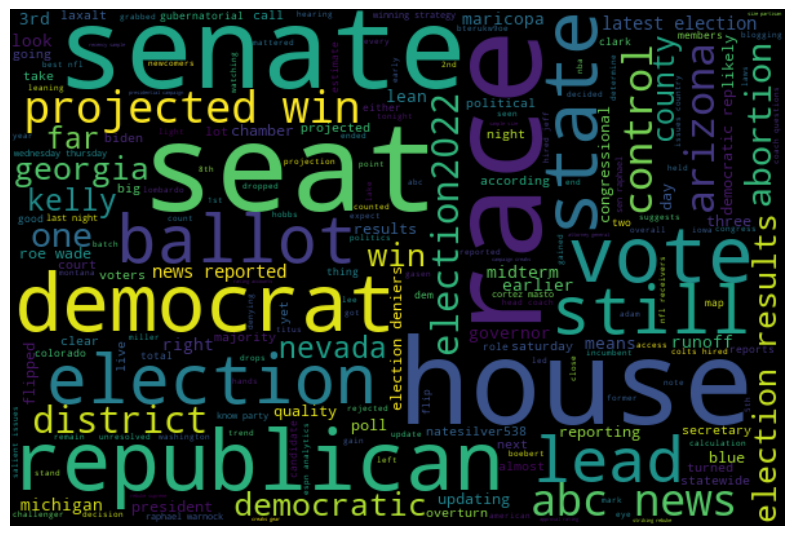

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

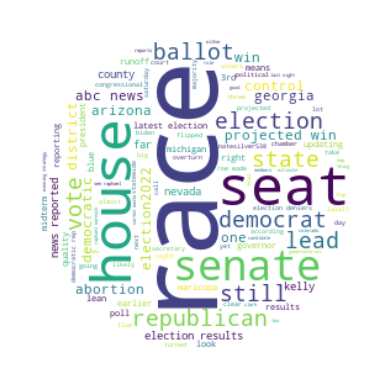

In [41]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [42]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [44]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [45]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [46]:
fd

FreqDist({'election': 24, 'house': 22, 'senate': 20, 'race': 17, 'win': 17, 'projected': 14, 'democrats': 13, 'abc': 13, 'state': 13, 'seats': 13, ...})

### Most common words

In [48]:
# find the 3 most common words
top_3 = fd.most_common(n=3)

top_3

[('election', 24), ('house', 22), ('senate', 20)]

In [50]:
# Check your code
assert top_3 == [('election', 24), ('house', 22), ('senate', 20)]

In [51]:
# show the 3 most common words as table
fd.tabulate(3)

election    house   senate 
      24       22       20 


### Plot common words

In [52]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('election', 24),
 ('house', 22),
 ('senate', 20),
 ('race', 17),
 ('win', 17),
 ('projected', 14),
 ('democrats', 13),
 ('abc', 13),
 ('state', 13),
 ('seats', 13)]

In [53]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
abc,13
democrats,13
election,24
house,22
projected,14
race,17
seats,13
senate,20
state,13
win,17


In [54]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,abc,13
1,democrats,13
2,election,24
3,house,22
4,projected,14
5,race,17
6,seats,13
7,senate,20
8,state,13
9,win,17


In [55]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [56]:
# Show frequency of a specific word
fd["election"]

24